<a href="https://colab.research.google.com/github/siddhant-dutta/DS303_Assignment1/blob/master/DS303_Assignment1_200110106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Honour Code </h1>

This submission is my own work, except where I have acknowledged the use of the works of other people.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/DS303_Assignment1/master/restaurent.csv')

#Mean of the price 
# y = ax1 + bx2 + cx3 + e
price = df['price']
mean_noise = price.mean()
std_noise = price.std()
df
#print(f'The mean is {mean_error} and the standard deviation is {std_error}')

,food,decor,service,price
0,18.0,22.0,17.0,41.0
1,24.0,22.0,22.0,54.0
2,18.0,17.0,14.0,32.0
3,18.0,9.0,13.0,20.0
4,21.0,12.0,16.0,25.0
...,...,...,...,...
109,20.0,21.0,18.0,40.0
110,18.0,14.0,16.0,30.0
111,17.0,17.0,18.0,34.0
112,20.0,22.0,21.0,51.0


In [8]:
# Randomly selecting 50 samples from the dataset
df = df.sample(n=50,random_state = 1)

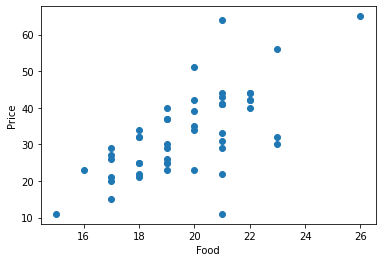

In [9]:
# Plotting food vs price
plt.scatter(df['food'],df['price'])
plt.xlabel('Food')
plt.ylabel('Price')
plt.show()

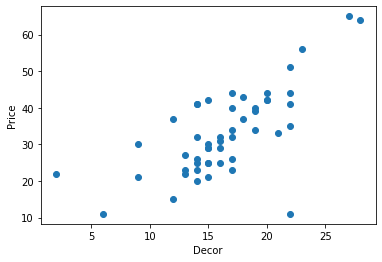

In [10]:
# Plotting decor vs price
plt.scatter(df['decor'],df['price'])
plt.xlabel('Decor')
plt.ylabel('Price')
plt.show()

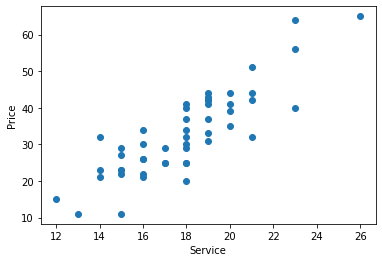

In [11]:
# Plotting service vs price
plt.scatter(df['service'],df['price'])
plt.xlabel('Service')
plt.ylabel('Price')
plt.show()

In [12]:
# Splitting the dataset into Dependent and Independent Variables
from sklearn.model_selection import train_test_split
x = df.iloc[:,:3]
y = df.iloc[:,3]

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.values,y.values)

LinearRegression()

In [16]:
first_prediction = reg.predict([[125,148,265]])
lower_limit = first_prediction[0] - 1.96*std_noise
upper_limit = first_prediction[0] + 1.96*std_noise
print(f'The 95% predictive interval is [{lower_limit},{upper_limit}]')

array([762.43720441])

In [17]:
reg.coef_
# Food , decor and services

array([1.39955198, 0.71207729, 1.97613517])

<h1> Coefficient of Determination

In [20]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x.values)
r2_score(y.values, y_pred)

0.777858913799886

* It can be referred that **77.79%** of the changeability of the dependent output attribute can be explained by the model while the remaining 22.21 % of the variability is still unaccounted for.
* $R^2$ indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

<h1><b> c) What is the interpretation of the coefficient estimate for the explanatory variable food
in the multiple regression from part (b) ? </h1>

* The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

* The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.

<b> Interpretation of slope:- </b> For each unit increase in food rating the price increases by 1.39955

<h2> <b>d) Why are
the estimates of coefficients of food rating different in the simple regression b/w price and food rating and multiple regression?</b>

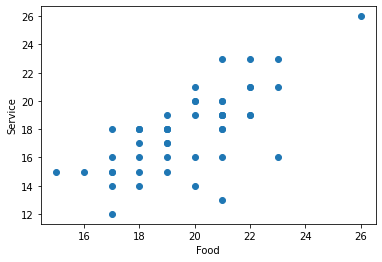

In [18]:
#Plotting food vs service
plt.scatter(df['food'],df['service'])
plt.xlabel('Food')
plt.ylabel('Service')
plt.show()



<b>As plotted above, the food and price are related in a positive way. A
better restaurant tend to have good food, service and decor... and also a higher price. Thus, the above obervation does make sense. The service rating can be expressed as:- 

* $ service = m*food+c$  &ensp; --> &ensp;  (A)

* Also,in our multiple linear regression model:-

  $ price = w1*food + w2*service + w3*decor $

* On substituting the (A) in the above expression

  $ price = w1*food + w2*{(m*food+c)} + w3*decor $

  &emsp;&emsp;&emsp;$  = food(w1 + m*w2) + c*w2 + w3*decor $


* Here w1, w2, c and m all are positive. Hence we can predict that the estimate of the coefficent of food rating in simple linear regression of price on food should be greater than the estimate of the coefficent of food rating in regression of price on food,service and decor.

* Also,
When food goes up service and decor tend to go up as well
but since they are not in the regression, the coefficient for food has to reflect the other
factors. Once decor and service are in the regression, the coefficient for food just has
to reflect the impact associated with food but not with the other variables



       
    


   

In [19]:
#d)
simple_reg = LinearRegression()
food = df.iloc[:,0]
price = df.iloc[:,-1]
food = food.values.reshape(-1,1)
food.shape

simple_reg.fit(food,price.values)
simple_reg.coef_

array([3.67489193])

Thus, our assumption was right !!!

<h2> <b> e) Suppose I asked you to use the multiple regression results to predict the price of a meal at a restaurant with food = 20, service = 3, and decor =17.
How would you feel about it? </b>

* We just dont see in our data restaurants with that low of a service rating
given food equal to 20 and decor equal to 17. This would be a extreme extrapolation from what we have seen so far and the model might not be appropriate